In [1]:
import numpy as np
import string
from sklearn.model_selection import train_test_split
import gensim.downloader as model_downloader
from sklearn.preprocessing import scale

`Step 1: Load the Wikipedia GLoVE Word2Vec.`

In [2]:
glove_w2v = model_downloader.load('glove-wiki-gigaword-100')

In [3]:
glove_w2v

`Step 2: Show how similar are these words:`
- Man and Woman
- Chair and Throne
- water and baby

In [4]:
print('Similarity between man and woman: {}'.format(glove_w2v.similarity('man', 'woman')))
print('Similarity between chair and throne: {}'.format(glove_w2v.similarity('chair', 'throne')))
print('Similarity between water and baby: {}'.format(glove_w2v.similarity('water', 'baby')))

Similarity between man and woman: 0.832349419593811
Similarity between chair and throne: 0.3001340329647064
Similarity between water and baby: 0.40317270159721375


`Step 3: Using these provide analogies for the following:`
- _____ is to King as Woman is to Man.
- _____ is to Princess as Man is to Woman.
- _____ is to a woman as a child is to an adult.

In [5]:
closest = glove_w2v.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print(f'{closest[0][0].title()} is to King as Woman is to Man.')

Queen is to King as Woman is to Man.


In [6]:
closest = glove_w2v.most_similar(positive=['princess', 'man'], negative=['woman'], topn=1)

print(f'{closest[0][0].title()} is to Princess as Man is to Woman.')

Prince is to Princess as Man is to Woman.


In [7]:
closest = glove_w2v.most_similar(positive=['woman', 'child'], negative=['adult'], topn=1)

print(f'{closest[0][0]} is to woman as a child is to an adult.')

mother is to woman as a child is to an adult.


`Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.`

In [8]:
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MidAutumnFestival\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
# dropping unused columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# CODE FROM DEMO
# preprocessing text
def text_pre_processing(sms):
    
    # removing punctuations
    sms_wo_punct = [x for x in sms if x not in string.punctuation]
    sms_wo_punct = ''.join(sms_wo_punct)
    
    # keeping only english letters
    sms_wo_punct_only_words = [x for x in sms_wo_punct if x.isalpha() or x == " "]
    sms_wo_punct_only_words = ''.join(sms_wo_punct_only_words)
    
    # converting the data to lower case
    sms_wo_punct_only_words_lc = sms_wo_punct_only_words.lower()
    
    # removing stopwords
    sms_wo_punct_only_words_lc = sms_wo_punct_only_words_lc.split(" ")
    sms_wo_punct_only_words_lc_wo_sw = [x for x in sms_wo_punct_only_words_lc if x not in stopwords.words('english')]
    sms_wo_punct_only_words_lc_wo_sw = ' '.join(sms_wo_punct_only_words_lc_wo_sw)
    
    return sms_wo_punct_only_words_lc_wo_sw

In [12]:
# Preprocess v2
data['v2'] = data['v2'].apply(text_pre_processing)
data

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,nd time tried contact u u å pound prize clai...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [13]:
X = data['v2']
y = data['v1']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2023)

In [15]:
x_train[:5]

4570              cha quiteamuzing thatåõscool babe
1638              great comedycant stop laughing da
1807                     nice day today love dearly
1478    think far find check google maps place dorm
834                             surely result offer
Name: v2, dtype: object

In [16]:
import gensim

gensim.__version__

'4.3.2'

In [17]:
# CODE FROM DEMO

from gensim.models.word2vec import Word2Vec

# Using word to vec
alg = Word2Vec(vector_size=500, min_count=1)
alg.build_vocab(x_train)
alg.train(x_train, total_examples=len(x_train), epochs=alg.epochs)

# converting words to vector
def convert_word_to_vector(sms, size):
    vec = np.zeros(500).reshape((1, 500))
    count = 0
    for word in sms:
        try:
            vec += alg.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# converting training and testing to vectors
x_train_vecs = scale(np.concatenate([convert_word_to_vector(z, 500) for z in x_train]))
x_test_vecs = scale(np.concatenate([convert_word_to_vector(z, 500) for z in x_test]))

In [18]:
nb = GaussianNB()
nb.fit(x_train_vecs, y_train)

GaussianNB()

In [19]:
import scikitplot as skplt

import matplotlib.pyplot as plt

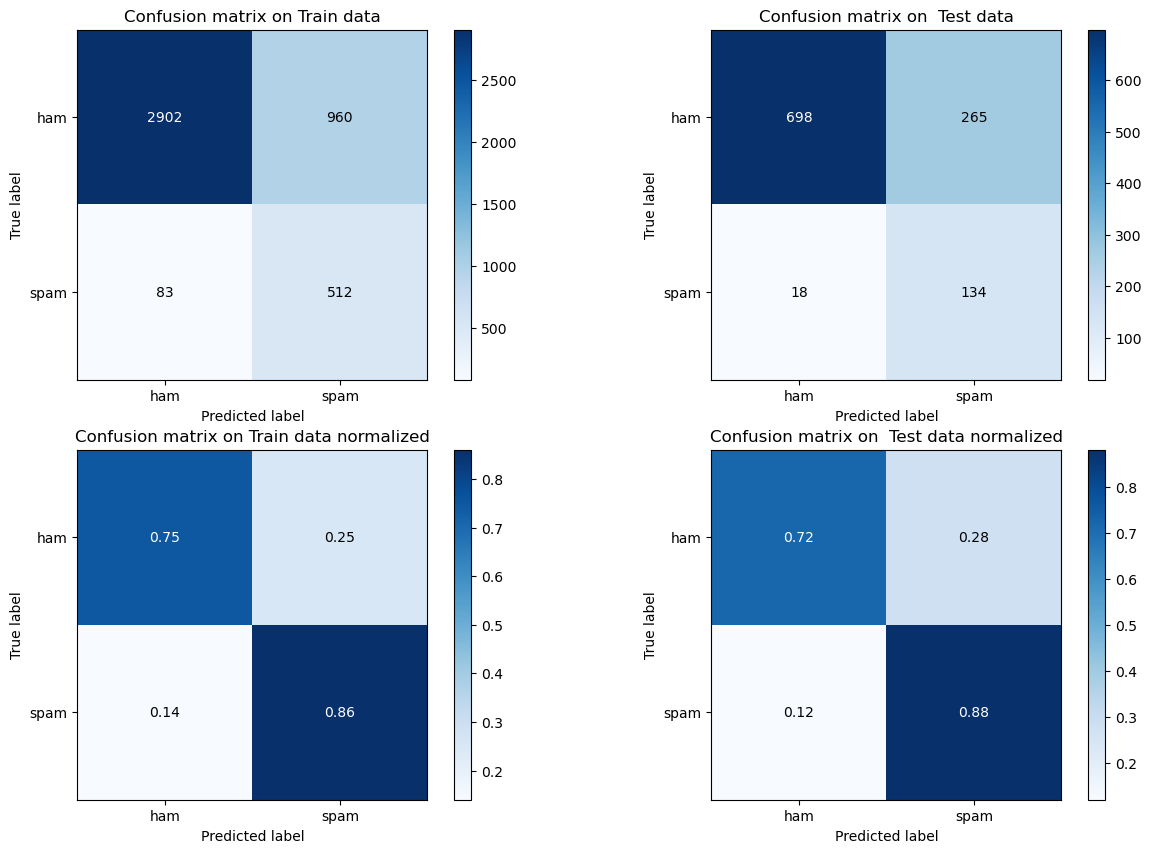

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (feats, targets, mode) in enumerate(zip((x_train_vecs, x_test_vecs), (y_train, y_test), ('Train',' Test'))):
    pred = nb.predict(feats)
    skplt.metrics.plot_confusion_matrix(targets, pred, normalize=False, ax=axs[0, i])
    skplt.metrics.plot_confusion_matrix(targets, pred, normalize=True, ax=axs[1, i])
    axs[0, i].set_title(f'Confusion matrix on {mode} data')
    axs[1, i].set_title(f'Confusion matrix on {mode} data normalized')
